In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go

# отключим предупреждения Anaconda
import warnings
warnings.simplefilter('ignore')

init_notebook_mode(connected=True)

## Гистограммы

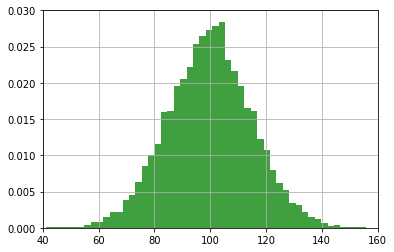

In [29]:
x = 100 + 15 * np.random.randn(10000)

# the histogram of the data
plt.hist(x, 50, density=True, facecolor='g', alpha=0.75)
plt.axis([40, 160, 0, 0.03])
plt.grid(True)

## Столбчатые диаграммы

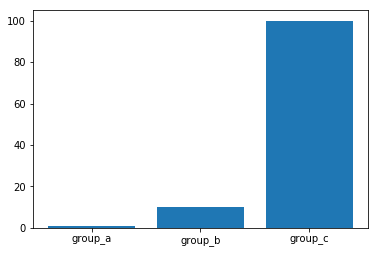

In [31]:
names = ['group_a', 'group_b', 'group_c']
values = [1, 10, 100]

plt.bar(names, values);

## Реальные данные + seaborn, pyplot,pandas

Все примеры сделаны на основе данных об участниках Олимпийских игр

In [2]:
df = pd.read_csv('athlete_events.csv')
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [3]:
df.shape

(271116, 15)

Покажем распределение количества участников по разным олимпиадам разных лет

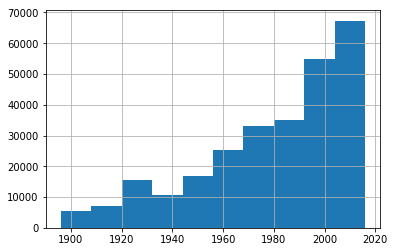

In [8]:
df.Year.hist();

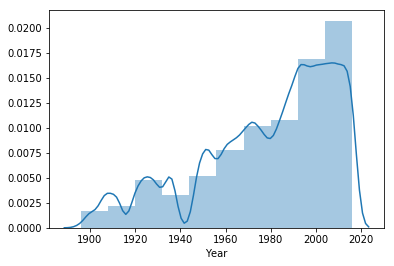

In [74]:
sns.distplot(df.Year, bins=10);

Просто красиво

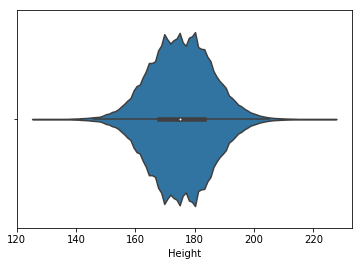

In [71]:
sns.violinplot(x='Height', data=df)

Покажем количество золотых медалей Китая по годам

In [53]:
china_gold = df[(df.Medal == 'Gold') &
                (df.Team == 'China')].Year.value_counts()
china_gold

2008    72
2012    50
2016    44
2004    42
2000    31
1984    24
1992    14
1996    13
2010     7
1988     4
2014     3
2006     2
2002     2
Name: Year, dtype: int64

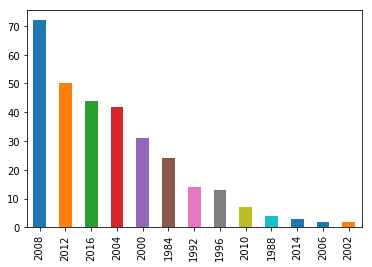

In [51]:
china_gold.plot(kind='bar');

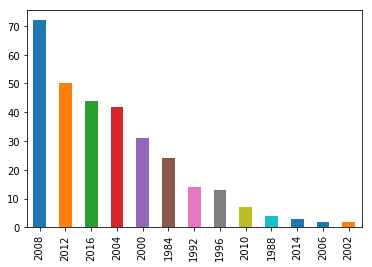

In [52]:
china_gold.plot.bar();

Для сохранения порядка годов воспользуемся seaborn

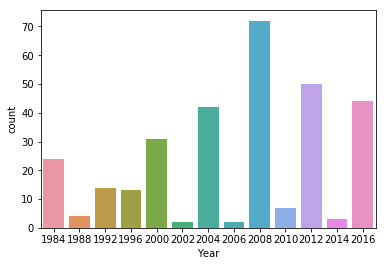

In [55]:
sns.countplot(df[(df.Medal == 'Gold') &
                 (df.Team == 'China')].Year);

Seaborn позволяется также строить распределение для нескольких прзнаков

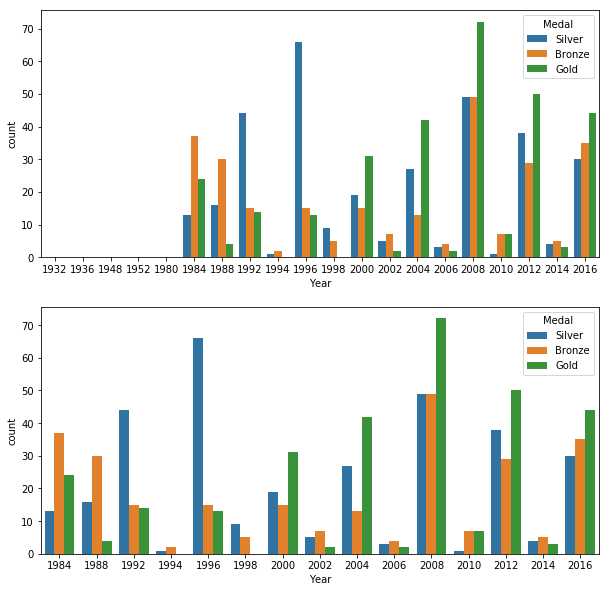

In [67]:
plt.figure(figsize=(10,10))

plt.subplot(2,1,1)
sns.countplot(x='Year', 
              hue='Medal',
              data=df[df.Team == 'China']);

plt.subplot(2,1,2)
sns.countplot(x='Year', 
              hue='Medal',
              data=df[(df.Team == 'China') & (~df.Medal.isna())]);

### Интерактивные диаграммы с Plotly

In [82]:
trace1 = go.Bar(
    x=['giraffes', 'orangutans', 'monkeys'],
    y=[20, 14, 23],
    name='SF Zoo'
)
trace2 = go.Bar(
    x=['giraffes', 'orangutans', 'monkeys'],
    y=[12, 18, 29],
    name='LA Zoo'
)

data = [trace1, trace2]
layout = go.Layout(
    barmode='group'
)

fig = go.Figure(data=data, layout=layout)
iplot(fig)

In [110]:
group = df[(df.Team == 'China') & (~df.Medal.isna())].groupby('Year')['Medal'].count()
group

Year
1984     74
1988     50
1992     73
1994      3
1996     94
1998     14
2000     65
2002     14
2004     82
2006      9
2008    170
2010     15
2012    117
2014     12
2016    109
Name: Medal, dtype: int64

In [111]:
trace1 = go.Bar(
    x=[str(i) for i in group.index],
    y=group.values,
    name='China medals'
)

data = [trace1]
layout = {'title': 'China medals', 'xaxis': {'title': 'Year'}}

fig = go.Figure(data=data, layout=layout)
iplot(fig, show_link=False)

In [112]:
china_medals = pd.crosstab(df[(df.Team == 'China') & (~df.Medal.isna())].Year,
            df[(df.Team == 'China') & (~df.Medal.isna())].Medal)
china_medals

Medal,Bronze,Gold,Silver
Year,,,
1984,37,24,13
1988,30,4,16
1992,15,14,44
1994,2,0,1
1996,15,13,66
1998,5,0,9
2000,15,31,19
2002,7,2,5
2004,13,42,27


In [113]:
gold = go.Bar(
    x=[str(i) for i in china_medals.index],
    y=china_medals.Gold,
    name='Gold'
)
bronze = go.Bar(
    x=[str(i) for i in china_medals.index],
    y=china_medals.Bronze,
    name='Bronze'
)
silver = go.Bar(
    x=[str(i) for i in china_medals.index],
    y=china_medals.Silver,
    name='Silver'
)

data = [gold, silver, bronze]
layout = {'title': 'China medals', 'xaxis': {'title': 'Year'}}

fig = go.Figure(data=data, layout=layout)
iplot(fig, show_link=False)